# Monty Hall problem - SIMULATION

In [17]:
import random as rd
import pandas as pd
import seaborn as sns
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def game():
    result = []
    gate = [0,0,1]
    rd.shuffle(gate)  # randomly chose gate with car
    chosed_gate = gate[rd.randint(0,2)]  # player randomly choses gate
    change = rd.randint(0,1)  # player randomly choses to change gate or stay
    
    if change == 0:
        return "stay_win" if chosed_gate == 1 else "stay_fail"
    if change == 1:
        return "change_fail" if chosed_gate == 1 else "change_win"
    return result

def add_probability(result):
    result["P(w|stay)"] = result["stay_win"]/(result["stay_fail"] + result["stay_win"])
    result["P(w|change)"] = result["change_win"]/(result["change_fail"] + result["change_win"])

def make_table(n): 
    """Function makes table from single simulations.""" 
    
    result = defaultdict(int)         
    for i in range(n):
        r = game()
        result[r] += 1
            
    add_probability(result) # adds to arrays P(Win|Stay) and P(Win|Change)
    return result

def make_array_of_results(start, stop, power):
    """Function produces range of results from multiple simulations to see tendencies."""
    
    result = defaultdict(list)
    array = np.array(range(start, stop))**power
    result["array"] = array # this array contains values for x axis in plot
    for i in array: # this to lists will be values for y axis in plot
        result["P(w|stay)"].append(make_table(i)["P(w|stay)"])
        result["P(w|change)"].append(make_table(i)["P(w|change)"])

    return result


In [19]:
rd.seed(0) # zerowanie losowości - dzięki temu można zastosować to w testach 

# testy funkcji game()

assert game() == 'change_win'
assert game() == 'change_win'
assert game() == 'stay_fail'
assert game() == 'stay_fail'
assert game() == 'stay_fail'
assert game() == 'stay_fail'
assert game() == 'stay_fail'
assert game() == 'stay_win'
assert game() == 'change_win'
assert game() == 'change_win'

# testy funkcji make_table(n)

assert make_table(100) == {'change_fail': 17, 'change_win': 36,
                           'stay_fail': 30, 'stay_win': 17,
                           'P(w|stay)': 0.3617021276595745, 'P(w|change)': 0.6792452830188679}

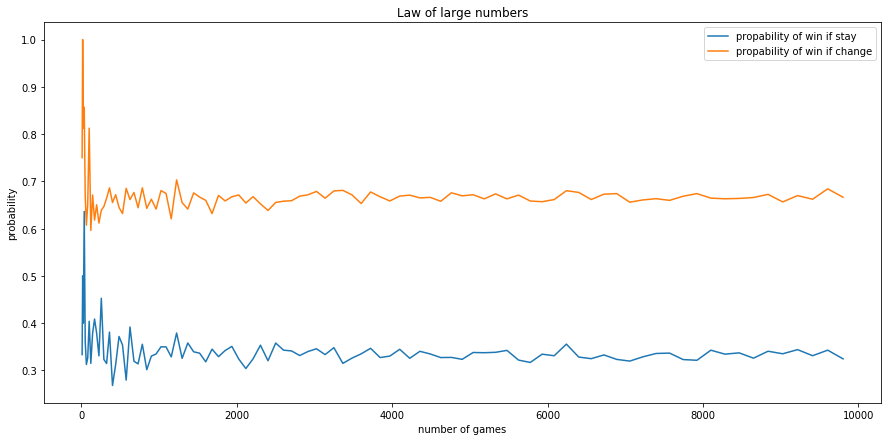

In [20]:
result_1 = make_array_of_results(3, 100, 2)
plt.figure(figsize=(15,7))
plt.plot(result_1["array"], result_1["P(w|stay)"], label="propability of win if stay");
plt.plot(result_1["array"], result_1['P(w|change)'], label="propability of win if change");
plt.legend()
plt.xlabel("number of games")
plt.ylabel("probability")
plt.title("Law of large numbers");


In [21]:
print("100000 iterations")
make_table(100000)

100000 iterations


defaultdict(int,
            {'change_fail': 16570,
             'change_win': 33380,
             'stay_win': 16566,
             'stay_fail': 33484,
             'P(w|stay)': 0.330989010989011,
             'P(w|change)': 0.6682682682682682})